# **Term Structure of Interest Rates**

In [1]:
from datetime import datetime
from datetime import timedelta
import scipy.optimize as optimize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def ytm_zero(p, maturity, fv=100):
  """
  p: coupon payment ($)
  fv: Face value ($)
  maturity: Time to maturity (years)

  Returns: Yield to maturity
  """
  ytm = (fv/p)**(1/maturity) - 1

  return round(100 * ytm, 2)

def df_zero(y, m):
  """
  y: Yield to maturity (%)
  m: Time to maturity (years)

  Returns: Discount factor
  """
  df = 1 / (1 + y/100)**m

  return round(df, 2)


def price_zero_bond(p, m, y):
  """
  p: coupon payment ($)
  m: Time to maturity (years)
  y: Yield to maturity (%)

  Returns: Price of a bond
  """
  price = 0
  for i in y:
    x = y.index(i)
    df = p[x] / (1 + y[x]/100)**m[x]
    price += df

  return price


def ytm_zero_bond(price, p, m, ytm=0.05):
  """
  price: price of the coupon bond ($)
  p: coupon payment ($)
  m: Time to maturity (years)

  Returns: Yield to maturity of a bond
  """

  ytm_func = lambda y : \
  sum([p[m.index(t)] / (1 + y)**t for t in m]) - price

  return round(100*optimize.newton(ytm_func, ytm), 2)

def SIR(sir, i=1):
  """
  sir: Spot interest rates dictionary {t (years): interest rate (%)} 
  i: Forward i-year

  Returns: Forward 1-year interest rates dictionary
  """

  fr = {}
  for t in sir:
    if t == i:
      fr[t-i] = sir[t]
    elif t > i:
      f = (((1 + sir[t]/100)**t / (1 + sir[t - 1]/100)**(t - i))**(1/i)) - 1 
      fr[t-i] = round(100*f, 2)

  return fr

def SIRD (data, years):
  """
  data: list of spot interest rates (%) 
  years: list of years

  Returns: Dictionary {years: data}
  """
  sir = {}
  for y in years:
    sir[y] = data[y - 1]
  return sir

def SIRIT(sir, t, i):
  """
  sir: Dictionary {years: spot interest rates} 
  t: year interest
  i: forward year

  Returns: The i-year forward t year interest rates
  """
  if t <= i:
    f = sir[t]/100
  else:
    f = (((1 + sir[t]/100)**t / (1 + sir[t - 1]/100)**(t - i))**(1/i)) - 1

  return round(100*f, 2)

def paryield(d, m):
  """
  The function returns the par-yield
  
  d: Discount factors (list)
  m: Time to maturity in years (list))

  return: par-yield in years (list)
  """

  py = []
  pt = 0
  for i in range(len(m)):
    pt += d[i]
    if m[i] <= i:
      p = 100 * (1 - d[i]/100) / (d[i]/100)
      py.append(round(p, 2))
    else:
      p = 100* (1 - d[i]/100) / (pt/100)
      py.append(round(p, 2))
      
  return py

def pricecoupon_bond(coupon, ytm, maturity):
  """
  Return the price of a bond based on given coupon
  
  coupon: Coupon ($)
  ytm: Yield to maturity (%)
  maturity: Time to maturity (years)

  Returns: price
  """
  ytm = ytm/100
  dt = [i+1 for i in range(int(maturity))]
  price = sum([coupon/(1+ytm)**t for t in dt]) + 100/(1+ytm)**maturity
  
  return round(price,2)


def spot_zero(d, m):
  """
  d: Discount factor (%)
  m: Time to maturity (years)

  Returns: Spot IR (%)
  """
  spot = 100 * ((1 / (d/100))**(1 / m) - 1)

  return round(spot, 2)

### Calculate the YTM and the discount factors of the given zero-coupon bonds.

* Years: 1 - Price: 98.70 USD
* Years: 2 - Price: 101.70 USD
* Years: 3 - Price: 100.00 USD 

   Years  Price   YTM    DF
0      1   98.7  1.32  0.99
1      2  101.0 -0.50  1.01
2      3  100.0  0.00  1.00


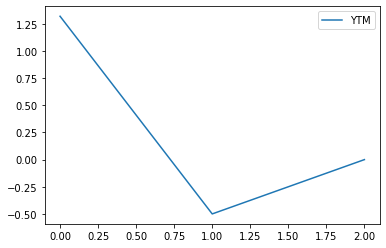

In [3]:
p = [98.7, 101, 100]
m = [1, 2, 3]

data = []
for i in p:
  ma = m[p.index(i)]
  ytm = ytm_zero(i, ma)
  df = df_zero(ytm, ma)
  data.append([ma, i, ytm, df])

df = pd.DataFrame(data, columns=['Years', 'Price', 'YTM', 'DF'])
print(df)

df.plot(y=['YTM'])
plt.show()

### Use the give yield curve to calculate the price of the give coupon bond and then calculate the coupon bond's YTM

The Term-Structure of Interest Rates:

Maturity 	1	/ 2	/ 3

YTM 	3 %	/ 4 %	/ 5 %
			
Table of future cash flow:

Maturity 	1	/ 2	/ 3

Cash-flow	5,00 /	5,00 /	105,00

In [4]:
# price_zero_bond(p, m, y)
m = [1, 2, 3]
y = [3, 4, 5]
p = [5, 5, 105]


price = price_zero_bond(p, m, y)
print(f'Price: ${round(price, 2)}')

Price: $100.18


In [5]:
# ytm_zero_bond(price, p, m, ytm=0.05)
ytm = ytm_zero_bond(price, p, m, ytm=0.05)
print(f'YTM: {ytm}%')

YTM: 4.93%


### Calculate the 2-year forward 3 year interest rate, f(2, 3), for both Indonesia and Brazil.

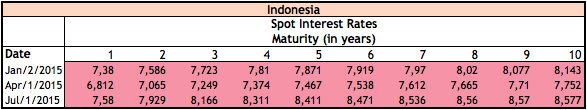

In [6]:
# SIRD (data, years)
# SIRIT(sir, t, i)
years = [1,	2,	3,	4,	5,	6,	7,	8,	9,	10]

data = [7.38,	7.586,	7.723,	7.81,	7.871,	7.919,	7.97,	8.02,	8.077,	8.143]
sir = SIRD (data, years)
print (f'jan/2/2015: {SIRIT(sir, 3, 2)}%')

data = [6.812,	7.065,	7.249,	7.374,	7.467,	7.538,	7.612,	7.665,	7.71,	7.752]
sir = SIRD (data, years)
print (f'apr/1/2015: {SIRIT(sir, 3, 2)}%')

data = [7.58,	7.929,	8.166,	8.311,	8.411,	8.471,	8.536,	8.56,	8.57,	8.577]
sir = SIRD (data, years)
print (f'jul/2/2015: {SIRIT(sir, 3, 2)}%')

jan/2/2015: 7.79%
apr/1/2015: 7.34%
jul/2/2015: 8.28%


### Calculate t-year forward 1-year interest rates and t-year forward 3-year interest rates curve and then t-year forward

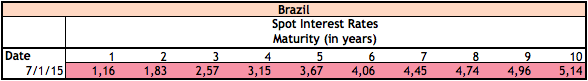

In [7]:
# SIRD (data, years)
data = [1.16,	1.83,	2.57,	3.15,	3.67,	4.06,	4.45,	4.74,	4.96,	5.14]
years = [1,	2,	3,	4,	5,	6,	7,	8,	9,	10]
sir = SIRD (data, years)

# SIR(sir, i=1)
fr1 = SIR(sir)
fr3 = SIR(sir, 3)
print(f'Forward 1-year interest rates: {fr1}')
print(f'Forward 3-year interest rates: {fr3}')

fir = {}
for y in years:
  f = SIRIT(sir, y, 1)
  fir[y-i] = round(100*f, 2)

print(f'1-year forward i-year interest rates: {fir}')

Forward 1-year interest rates: {0: 1.16, 1: 2.5, 2: 4.07, 3: 4.91, 4: 5.78, 5: 6.03, 6: 6.82, 7: 6.79, 8: 6.74, 9: 6.77}
Forward 3-year interest rates: {0: 2.57, 1: 3.34, 2: 4.02, 3: 4.45, 4: 4.97, 5: 5.23, 6: 5.4, 7: 5.56}
1-year forward i-year interest rates: {-99: 116.0, -98: 250.0, -97: 407.0, -96: 491.0, -95: 578.0, -94: 603.0, -93: 682.0, -92: 679.0, -91: 674.0, -90: 677.0}


### Calculate the discount factor and the par-yield.

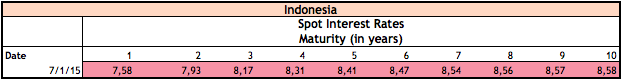



In [8]:
# df_zero(y, m)
years = [1,	2,	3,	4,	5,	6,	7,	8,	9,	10]
spot = [7.58,	7.929,	8.166,	8.311,	8.411,	8.471,	8.536,	8.56,	8.57,	8.577]

data = []
for i in spot:
  ma = years[spot.index(i)]
  df = df_zero(i, ma)
  data.append([ma, i, 100*df])

df = pd.DataFrame(data, columns=['Years', 'YTM', 'DF'])
print(df)


   Years    YTM    DF
0      1  7.580  93.0
1      2  7.929  86.0
2      3  8.166  79.0
3      4  8.311  73.0
4      5  8.411  67.0
5      6  8.471  61.0
6      7  8.536  56.0
7      8  8.560  52.0
8      9  8.570  48.0
9     10  8.577  44.0


   Years    YTM    DF    PY
0      1  7.580  93.0  7.53
1      2  7.929  86.0  7.82
2      3  8.166  79.0  8.14
3      4  8.311  73.0  8.16
4      5  8.411  67.0  8.29
5      6  8.471  61.0  8.50
6      7  8.536  56.0  8.54
7      8  8.560  52.0  8.47
8      9  8.570  48.0  8.46
9     10  8.577  44.0  8.50


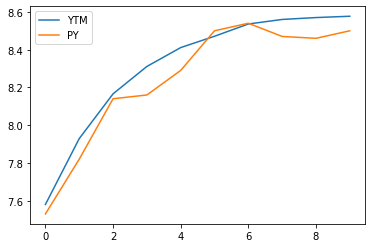

In [9]:
# paryield(d, m)
difa = df['DF'].tolist()
py = paryield(difa, years)
df['PY'] = py
print(df)
df.plot(y=['YTM', 'PY'])
plt.show()

### Calculate the price, the discount factor and the spot rate.

Maturity, Yield, Coupon
* 1, 6.78 %, 10.75
* 2, 7.91 %, 10.00
* 3, 8.17 %, 5.25
* 4, 8.36 %, 7.88
* 5, 8.51 %, 12.80
* 6, 8.35 %, 8.25
* 7, 8.56 %, 10.25
* 8, 8.55 %, 5.63
* 9, 8.48 %, 8.38
* 10, 8.48 %, 8.38

In [10]:
columns = ['Maturity', 'YTM', 'Coupon', 'Price', 'DF', 'Spot IR']
maturity = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
ytm = [6.7, 7.91, 8.17, 8.36, 8.51, 8.35, 8.56, 8.55, 8.48, 8.48]
coupon = [10.75, 10.00, 5.25, 7.88, 12.80, 8.25, 10.25, 5.63, 8.38, 8.38]

price = []
discount_factor = []
spor_ir = []
data = []
for i in range(len(maturity)):
  p = pricecoupon_bond(coupon[i], ytm[i], maturity[i])  # pricecoupon_bond(coupon, ytm, maturity)
  price.append(p)
  d = df_zero(ytm[i], maturity[i])  # df_zero(y, m)
  discount_factor.append(round(100*d, 2))
  s = spot_zero(round(100*d, 2), maturity[i])  # spot_zero(d, m)
  spor_ir.append(s)

  data.append([maturity[i], ytm[i], coupon[i], p, round(100*d, 2), s])

df = pd.DataFrame(data, columns=columns)
df

,Maturity,YTM,Coupon,Price,DF,Spot IR
0,1,6.70,10.75,103.80,94.0,6.38
1,2,7.91,10.00,103.73,86.0,7.83
2,3,8.17,5.25,92.50,79.0,8.17
3,4,8.36,7.88,98.42,73.0,8.19
4,5,8.51,12.80,116.90,66.0,8.67
5,6,8.35,8.25,99.54,62.0,8.29
6,7,8.56,10.25,108.63,56.0,8.64
7,8,8.55,5.63,83.56,52.0,8.52
8,9,8.48,8.38,99.39,48.0,8.50
9,10,8.48,8.38,99.34,44.0,8.56


### Create the cash-flow table.

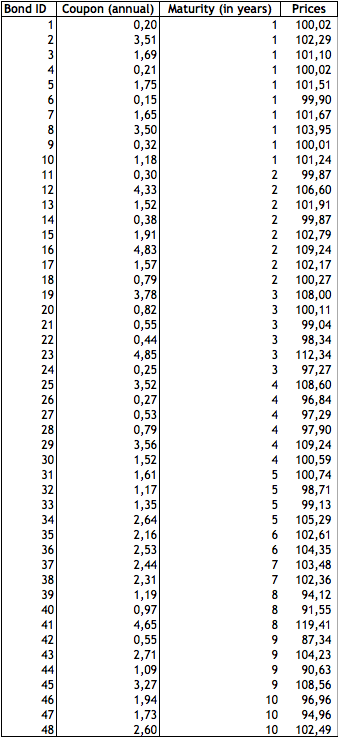

In [11]:
data = [
        [0.20, 1, 100.02], 
        [3.51, 1, 102.29],
        [1.69, 1, 101.10],
        [0.21, 1, 100.02],
        [1.75, 1, 101.51],
        [0.15, 1, 99.90],
        [1.65, 1, 101.67],
        [3.50, 1, 103.95],
        [0.32, 1, 100.01],
        [1.18, 1, 101.24],
        [0.30, 2, 99.87],
        [4.33, 2, 106.60],
        [1.52, 2, 101.91],
        [0.38, 2, 99.87],
        [1.91, 2, 102.79],
        [4.83, 2, 109.24],
        [1.57, 2, 102.17],
        [0.79, 2, 100.27],
        [3.78, 3, 108.00],
        [0.82, 3, 100.11],
        [0.55, 3, 99.04],
        [0.44, 3, 98.34],
        [4.85, 3, 112.34],
        [0.25, 3, 97.27],
        [3.52, 4, 108.60],
        [0.27, 4, 96.84],
        [0.53, 4, 97.29],
        [0.79, 4, 97.90],
        [3.56, 4, 109.24],
        [1.52, 4, 100.59],
        [1.61, 5, 100.74],
        [1.17, 5, 98.71],
        [1.35, 5, 99.13],
        [2.64, 5, 105.29],
        [2.16, 6, 102.61],
        [2.53, 6, 104.35],
        [2.44, 7, 103.48],
        [2.31, 7, 102.36],
        [1.19, 8, 94.12],
        [0.97, 8, 91.55],
        [4.65, 8, 119.41],
        [0.55, 9, 87.34],
        [2.71, 9, 104.23],
        [1.09, 9, 90.63],
        [3.27, 9, 108.56],
        [1.94, 10, 96.96],
        [1.73, 10, 94.96],
        [2.60, 10, 102.49]
        ]
columns = ['Coupon', 'Maturity', 'Prices']

df = pd.DataFrame(data, columns=columns)

df.head()

,Coupon,Maturity,Prices
0,0.20,1,100.02
1,3.51,1,102.29
2,1.69,1,101.10
3,0.21,1,100.02
4,1.75,1,101.51


In [12]:
# Iteration for coupon payment
for j in range(10):
  c = []
  for i in data:
    c.append(0) if i[1] < j + 1 else c.append(i[0])
  df['CP' + str(j +1)] = c
# Iteration for principle repayment
for j in range(10):
  c = []
  for i in data:
    c.append(100) if i[1] == j + 1 else c.append(0)
  df['PR' + str(j + 1)] = c

# Iteration for cashflows
for j in range(10):
  df['CF' + str(j + 1)] = df['CP'+ str(j + 1)] + df['PR'+ str(j + 1)]
df.head()

,Coupon,Maturity,Prices,CP1,CP2,CP3,CP4,CP5,CP6,CP7,CP8,CP9,CP10,PR1,PR2,PR3,PR4,PR5,PR6,PR7,PR8,PR9,PR10,CF1,CF2,CF3,CF4,CF5,CF6,CF7,CF8,CF9,CF10
0,0.20,1,100.02,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100,0,0,0,0,0,0,0,0,0,100.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.51,1,102.29,3.51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100,0,0,0,0,0,0,0,0,0,103.51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.69,1,101.10,1.69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100,0,0,0,0,0,0,0,0,0,101.69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.21,1,100.02,0.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100,0,0,0,0,0,0,0,0,0,100.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.75,1,101.51,1.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100,0,0,0,0,0,0,0,0,0,101.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
import statsmodels.api as sm

y = df['Prices'] 
x1 = df['CF1']
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Prices   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                  0.001074
Date:                Fri, 04 Jun 2021   Prob (F-statistic):              0.974
Time:                        10:13:26   Log-Likelihood:                -149.51
No. Observations:                  48   AIC:                             303.0
Df Residuals:                      46   BIC:                             306.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.3792      0.921    110.021      0.000      99.524     103.234
CF1            0.0007      0.020      0.033      0.974      -0.039       0.041
==============================================================================
Omnibus:                        6.923   Durbin-Watson:                   2.910
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                8.080
Skew:                           0.438   Prob(JB):                       0.0176
Kurtosis:                       4.809   Cond. No.                         53.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **Term premium**

### Calculate the forward rate and then the spot rates

i : 0,	1,	2,	3,	4,	5

E [y (1,1)] %: 4.90, 5.00, 5.10, 5.25, 5.15, 5.10

tp (i,1) %: 0.00, 0.20, 0.20, 0.20, 0.20, 0.20

   i  Ey(i,1)  tp(i,1)  f(i,1)      y(i)
0  0     4.90      0.0    4.90  4.900000
1  1     5.00      0.2    5.20  5.200000
2  2     5.10      0.2    5.30  5.249800
3  3     5.25      0.2    5.45  5.349608
4  4     5.15      0.2    5.35  5.424853
5  5     5.10      0.2    5.30  5.339968


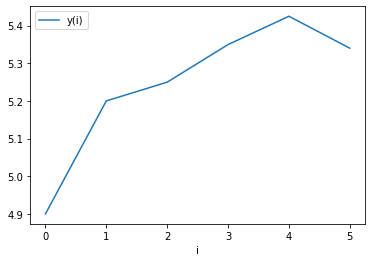

In [29]:
ii = [0, 1, 2, 3, 4, 5]
eyi = [4.90, 5.00, 5.10, 5.25, 5.15, 5.10]
tpi = [0.00, 0.20, 0.20, 0.20, 0.20, 0.20]

data = []
fi = []
yi = []
for i in ii:
  f = eyi[i] + tpi[i]
  fi.append(f)
  if i == 0:
    y = f
  else:
    y = (((1 + fi[i - 1])**(i - 1)) * (1 + fi[i]))**(1/i) - 1
  yi.append(y)
  data.append([i, eyi[i], tpi[i], f, y])

df = pd.DataFrame(data, columns=['i', 'Ey(i,1)', 'tp(i,1)', 'f(i,1)', 'y(i)'])

print(df)

df.plot('i', 'y(i)')
plt.show()



---



### 3) Suppose that the 1-year zero-coupon bond is trading at 98 USD, the 2-year zero-coupon bond is trading at 94 USD and the 3-year zero-coupon bond is trading at 92 USD. Calculate y1, y2, and y3. 